In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
%matplotlib inline

df_train = pd.read_csv('train.csv')

In [101]:
df_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
from numpy import nan # 欠損値NaN（Not a Number）

In [103]:
# 各特徴量の欠損値をカウント
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
## 欠損値は、cabinとageの二つの説明変数で多く確認された。
## cabin(客室番号)は、そこまで重要ではないと考えられる。(Pclassが分かるので、、)
## ageは重要そう、、　子供やお年寄りが優先して救助されそう
## ageの欠損地処理はどうしよう、、

In [105]:
# 名義特徴量のエンコーディング
# Embarkedをエンコーディングする
a = pd.get_dummies(df_train['Embarked'])
a[:5]

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [106]:
# Sexをエンコーディングする
b = pd.get_dummies(df_train['Sex'])
b[:5]

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


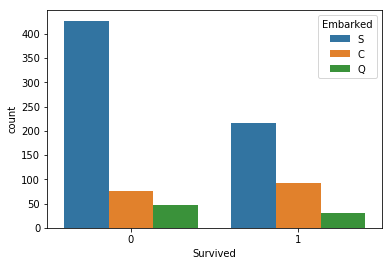

In [107]:
# Embarkedを確認する
import seaborn as sns
sns.countplot("Survived", data = df_train, hue = "Embarked")

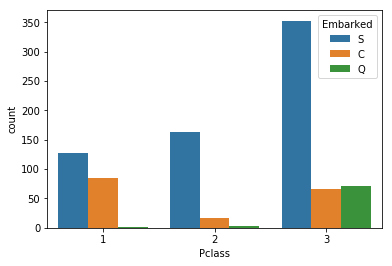

In [108]:
## Sクラスの部屋の人は死亡率高そうだなあ、、

# EmbarkedとPclassの関係を可視化する
sns.countplot("Pclass", data = df_train, hue = "Embarked")

In [109]:
## Pclass1,2の人はEmbarked:Qの人いないやん！

In [110]:
# Embarkedの列を削除する
c = df_train.drop("Embarked", axis=1)

In [111]:
# エンコーディングされたEmbarkedとSexの列を追加する
e = pd.concat([c,a,b], axis=1)
e[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [112]:
# pclass(部屋のグレード)やfare(運賃)によって、survived(生存)の可否が変わりそう、、
# pclassとfareの相関係数たかそう、、

In [113]:
# pdの列を並び替える
f = pd.DataFrame(e,columns=["PassengerId","Survived","Pclass","Name","female","male","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","C","Q","S"])
f.head()

,PassengerId,Survived,Pclass,Name,female,male,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,1,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,1,male,35.0,0,0,373450,8.0500,NaN,0,0,1


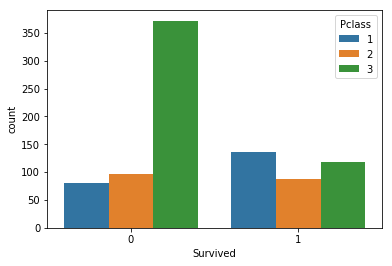

In [114]:
# pclassとsurvivedの関係を数える
import seaborn as sns
from collections import Counter
sns.countplot("Survived", data = f, hue = "Pclass")
## 非生存者にはPclassが3の人が明らかに多い,,,

In [115]:
for i in np.unique(f.Pclass):
    print("{}等級のクラスのFare平均は{:.2f}".format(i, f[f["Pclass"] == i].Fare.mean()))

1等級のクラスのFare平均は84.15
2等級のクラスのFare平均は20.66
3等級のクラスのFare平均は13.68


In [116]:
## ageの欠損値が大きいけど、子供とか高齢者の方が生存率高いのか調べてみよう

In [117]:
# 18歳以上で男性ならmale, 女性ならfemale, 18歳以下ならchildを表示する列の作成
Age = df_train['Age']
Sex = df_train['Sex']

In [118]:
Sex2 = []
for i in range(len(Age)):
    if Age[i] >= 18:
        Sex2.append(Sex[i])
    else:
        Sex2.append('child')
Sex2[:10]

['male',
 'female',
 'female',
 'female',
 'male',
 'child',
 'male',
 'child',
 'female',
 'child']

In [119]:
## 欠損値がchildになっちゃう。
# ageの欠損値処理を行わないとダメだ・・・
# Nameの敬称から平均値を算出して補完する処理を行う

In [120]:
Mr, Mrs, Miss, Master = [], [], [], []
Name_lst = []
Name = f['Name']
for i in range(len(Name)):
    if Age[i] > 0:    
        if 'Mr.' in Name[i]:
            Mr.append(Age[i])
        elif 'Mrs.' in Name[i]:
            Mrs.append(Age[i])
        elif 'Miss.' in Name[i]:
            Miss.append(Age[i])
        elif 'Master.' in Name[i]:
            Master.append(Age[i])
        else:
            Name_lst.append(Name[i])

In [121]:
# 平均値の算出
from statistics import mean, median,variance,stdev
Mr_mean = mean(Mr)
Mrs_mean = mean(Mrs)
Miss_mean = mean(Miss)
Master_mean = mean(Master)

In [122]:
print(Mr_mean)
print(Mrs_mean)
print(Miss_mean)
print(Master_mean)

32.3680904523
35.8981481481
21.7739726027
4.57416666667


In [123]:
# nameの敬称ごとに欠損値処理を行う
f[[True if "Mr." in i else False for i in f.Name]] = f[[True if "Mr." in i else False for i in f.Name]].fillna(Mr_mean)
f[[True if "Mrs." in i else False for i in f.Name]] = f[[True if "Mrs." in i else False for i in f.Name]].fillna(Mrs_mean)
f[[True if "Miss." in i else False for i in f.Name]] = f[[True if "Miss." in i else False for i in f.Name]].fillna(Miss_mean)
f[[True if "Master." in i else False for i in f.Name]] = f[[True if "Master." in i else False for i in f.Name]].fillna(Master_mean)

In [124]:
# f_1はageの欠損値処理済みのdataframe
f_1 = f

In [125]:
# Cabinにもfillnaしちゃった、、けどCabinは説明変数として用いないから、そのままでいいか、、
# 欠損値の確認
f_1.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
female          0
male            0
Sex             0
Age             1
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          14
C               0
Q               0
S               0
dtype: int64

In [126]:
## ageに1人だけ欠損値の人がいるなあ、、
# 18歳以上で男性ならmale, 女性ならfemale, 18歳以下ならchildを表示する列の作成
Age = f_1['Age']
Sex = f_1['Sex']
Sex2 = []
for i in range(len(Age)):
    if Age[i] >= 18:
        Sex2.append(Sex[i])
    else:
        Sex2.append('child')

In [127]:
f_1.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
female          0
male            0
Sex             0
Age             1
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          14
C               0
Q               0
S               0
dtype: int64

In [128]:
# 18歳以下がchildになるような列Sex2をデータフレームに追加する
f_1["Sex2"] = DataFrame(Sex2)

In [129]:
# 説明変数Sexは不要だから削除する
f_1.drop("Sex", axis=1).head()

,PassengerId,Survived,Pclass,Name,female,male,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",0,1,22.0,1,0,A/5 21171,7.2500,32.3681,0,0,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,female
2,3,1,3,"Heikkinen, Miss. Laina",1,0,26.0,0,0,STON/O2. 3101282,7.9250,21.774,0,0,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,C123,0,0,1,female
4,5,0,3,"Allen, Mr. William Henry",0,1,35.0,0,0,373450,8.0500,32.3681,0,0,1,male


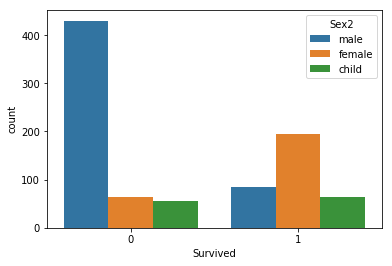

In [130]:
## これでやっと年齢によって生存の可否が見れる。。
# child, male, femaleで生存に差があるか確認する
sns.countplot("Survived", data = f_1, hue = "Sex2")

In [131]:
## 非生存者数：male(18歳以上)が5倍近く多い
## 生存者数　：female(18歳以上)が2倍以上多い
## でも'生存者率'を確認しないと一概には判断できなくね？？

In [132]:
# 総男性の数、生存した男性の数、非生存の男性の数を表示
male_all = f_1[f_1.Sex2 == "male"]
print("乗客の男性の総数は{}人".format(len(male_all)))
male_safe = f_1[f_1.Sex2 == "male"][f_1.Survived == 1]
print("生存者の男性の総数は{}人".format(len(male_safe)))
male_dead = f_1[f_1.Sex2 == "male"][f_1.Survived == 0]
print("非生存者の男性の総数は{}人".format(len(male_dead)))
print()
male_percent = len(male_safe)/len(male_all)
print("男性の生存率は{}%".format(male_percent))

乗客の男性の総数は514人
生存者の男性の総数は84人
非生存者の男性の総数は430人

男性の生存率は0.16342412451361868%


/Users/furukawakoichi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/furukawakoichi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


([<matplotlib.patches.Wedge at 0x11386feb8>,
  <matplotlib.text.Text at 0x1138832e8>])

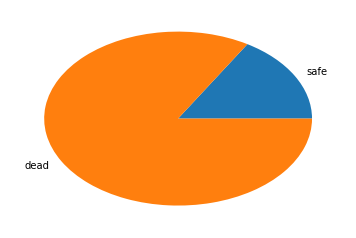

In [133]:
man_safe_pie = np.array([len(male_safe), len(male_dead)])
label = ["safe", "dead"]
plt.pie(man_safe_pie, labels=label)

In [134]:
# 総女性の数、生存した女性の数、非生存の女性の数を表示
female_all = f_1[f_1.Sex2 == "female"]
print("乗客の女性の総数は{}人".format(len(female_all)))
female_safe = f_1[f_1.Sex2 == "female"][f_1.Survived == 1]
print("生存者の女性の総数は{}人".format(len(female_safe)))
female_dead = f_1[f_1.Sex2 == "female"][f_1.Survived == 0]
print("非生存者の女性の総数は{}人".format(len(female_dead)))

print()
female_percent = len(female_safe)/len(female_all)
print("女性の生存率は{}%".format(female_percent))

乗客の女性の総数は259人
生存者の女性の総数は195人
非生存者の女性の総数は64人

女性の生存率は0.752895752895753%


/Users/furukawakoichi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/furukawakoichi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


([<matplotlib.patches.Wedge at 0x1a1432acf8>,
  <matplotlib.text.Text at 0x1a14339128>])

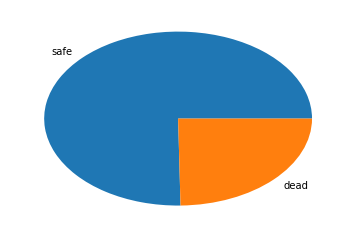

In [135]:
feman_safe_pie = np.array([len(female_safe), len(female_dead)])
label = ["safe", "dead"]
plt.pie(feman_safe_pie, labels=label)

In [136]:
# 総childの数、生存したchildの数、非生存のchildの数を表示
child_all = f_1[f_1.Sex2 == "child"]
print("乗客のchildの総数は{}人".format(len(child_all)))
child_safe = f_1[f_1.Sex2 == "child"][f_1.Survived == 1]
print("生存者のchildの総数は{}人".format(len(child_safe)))
child_dead = f_1[f_1.Sex2 == "child"][f_1.Survived == 0]
print("非生存者のchildの総数は{}人".format(len(child_dead)))

print()
child_percent = len(child_safe)/len(child_all)
print("childの生存率は{}%".format(child_percent))

乗客のchildの総数は118人
生存者のchildの総数は63人
非生存者のchildの総数は55人

childの生存率は0.5338983050847458%


/Users/furukawakoichi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/furukawakoichi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


([<matplotlib.patches.Wedge at 0x1a143fe9e8>,
  <matplotlib.text.Text at 0x1a14406dd8>])

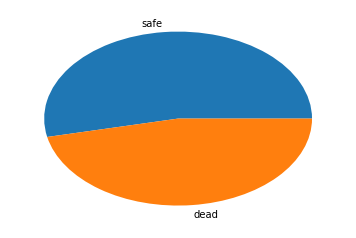

In [137]:
child_safe_pie = np.array([len(child_safe), len(child_dead)])
label = ["safe", "dead"]
plt.pie(child_safe_pie, labels=label)

In [138]:
male_percent,female_percent, child_percent
## 男性の生存率が約16%, 女性の生存率が約75%, child(18歳以上)の生存率が約53%と分かった

(0.16342412451361868, 0.752895752895753, 0.5338983050847458)

In [139]:
## 性差によってかなり生存率が異なることが確認できた

(array([  24.,   16.,   11.,    7.,   10.,    5.,    8.,   23.,   39.,
          40.,   88.,   46.,   42.,   43.,   47.,   37.,  151.,   58.,
          18.,   27.,   21.,   14.,   17.,   18.,   16.,   13.,    9.,
           7.,    7.,    6.,    7.,    4.,    4.,    0.,    2.,    3.,
           1.,    0.,    0.,    1.]),
 array([  0.42  ,   2.4095,   4.399 ,   6.3885,   8.378 ,  10.3675,
         12.357 ,  14.3465,  16.336 ,  18.3255,  20.315 ,  22.3045,
         24.294 ,  26.2835,  28.273 ,  30.2625,  32.252 ,  34.2415,
         36.231 ,  38.2205,  40.21  ,  42.1995,  44.189 ,  46.1785,
         48.168 ,  50.1575,  52.147 ,  54.1365,  56.126 ,  58.1155,
         60.105 ,  62.0945,  64.084 ,  66.0735,  68.063 ,  70.0525,
         72.042 ,  74.0315,  76.021 ,  78.0105,  80.    ]),
 <a list of 40 Patch objects>)

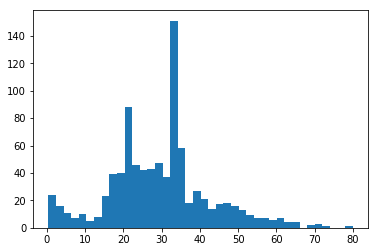

In [140]:
# 10歳ごとに年齢を区切ったら0~9歳のクラスの死亡率高そうだなあ、、
# ひとまず乗客の年齢層を確認してみる
plt.hist(f_1.Age.dropna(), bins = 40)

In [141]:
## 10歳以下の人、割といるなあ、、

In [142]:
# 客室のグレードごとにヒストグラムを出力
# 普通にこのコードの方がスッキリしてるじゃんか、、
# split_data = []
# for survived in [0,1]:
#     split_data.append(f_1[f_1.Survived==survived])

# temp = [i["Pclass"].dropna() for i in split_data]
# plt.hist(temp, histtype="barstacked", bins=6)

## 左から一等、二等、三等客室で、オレンジ色が生存した人で青色が死亡した人

([array([  15.,   13.,    8.,   63.,   94.,   66.,  152.,   42.,   30.,
           23.,   14.,   11.,   10.,    3.,    4.,    0.]),
  array([  48.,   20.,   19.,   96.,  158.,  108.,  207.,   84.,   47.,
           39.,   24.,   18.,   14.,    3.,    4.,    1.])],
 array([  0.42   ,   5.39375,  10.3675 ,  15.34125,  20.315  ,  25.28875,
         30.2625 ,  35.23625,  40.21   ,  45.18375,  50.1575 ,  55.13125,
         60.105  ,  65.07875,  70.0525 ,  75.02625,  80.     ]),
 <a list of 2 Lists of Patches objects>)

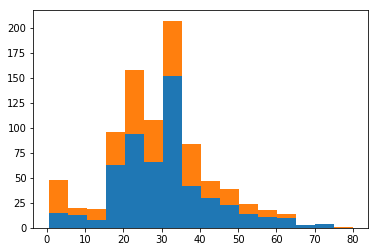

In [143]:
# 年齢ごとに生存率のヒストグラムを出力する
split_data = []
for survived in [0,1]:
    split_data.append(f_1[f_1.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

In [144]:
## うーん。幼児(赤ちゃん)は優先的に助けられているのかな？
## 反対に、年寄りは非生存率が高そう

In [145]:
#年齢を階層的に分けてみると見えてくるかも
age_bins = [0,10,20,30,40,50,60,70,80]
names = [0,1,2,3,4,5,6,7]

f_1_cut = pd.cut(f_1.Age, age_bins, labels = names)
f_1["Age2"] = DataFrame(f_1_cut)
#各年齢毎に生きてる割合を表示してみる
for i in np.unique(names):
    print("{}0代の平均生存率は{:.2f}".format(i, f_1[f_1["Age2"] == i].Survived.mean()))

00代の平均生存率は0.59
10代の平均生存率は0.38
20代の平均生存率は0.40
30代の平均生存率は0.33
40代の平均生存率は0.38
50代の平均生存率は0.40
60代の平均生存率は0.24
70代の平均生存率は0.20


In [146]:
## 0~9歳、60歳代以上を境にして3つのグループで分けてみよう

In [147]:
age_bins1 = [0,10,60,100]
names1 = [0,1,2]
f_1_cut = pd.cut(f_1.Age, age_bins1, labels = names1)
f_1["age2_1"] = DataFrame(f_1_cut)
ages = pd.get_dummies(f_1.age2_1)
ages.head()

,0.0,1.0,2.0
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [148]:
f_1["AgeLow"] = DataFrame(ages[0])
f_1["AgeMiddle"] = DataFrame(ages[1])
f_1["AgeHigh"] = DataFrame(ages[2])
f_1.head()

,PassengerId,Survived,Pclass,Name,female,male,Sex,Age,SibSp,Parch,...,Cabin,C,Q,S,Sex2,Age2,age2_1,AgeLow,AgeMiddle,AgeHigh
0,1,0,3,"Braund, Mr. Owen Harris",0,1,male,22.0,1,0,...,32.3681,0,0,1,male,2.0,1.0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,female,38.0,1,0,...,C85,1,0,0,female,3.0,1.0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,female,26.0,0,0,...,21.774,0,0,1,female,2.0,1.0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,female,35.0,1,0,...,C123,0,0,1,female,3.0,1.0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,1,male,35.0,0,0,...,32.3681,0,0,1,male,3.0,1.0,0,1,0


In [149]:
# trainデータで不要な列を削除する
f_1 = f_1.drop(["SibSp","Parch","Cabin","Ticket"], axis=1)

,PassengerId,Survived,Pclass,Name,female,male,Sex,Age,Fare,C,Q,S,Sex2,Age2,age2_1,AgeLow,AgeMiddle,AgeHigh
258,259,1,1,"Ward, Miss. Anna",1,0,female,35.0,512.3292,1,0,0,female,3.0,1.0,0,1,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,1,male,36.0,512.3292,1,0,0,male,3.0,1.0,0,1,0
737,738,1,1,"Lesurer, Mr. Gustave J",0,1,male,35.0,512.3292,1,0,0,male,3.0,1.0,0,1,0


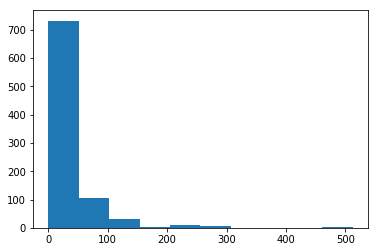

In [150]:
# Fareの値段でも確認してみようかな、
plt.hist(f_1.Fare, bins = 10)
f_1[f_1.Fare == f_1.Fare.max()]

In [151]:
## 一番金払っている人は生きてる、、(3ペアしかいないけど、
# Fareを昇順にして確認してみる。512払っている人以外にも何か法則あるかも！
sorted(f_1.Fare)[-10:-1]

[247.52080000000001,
 262.375,
 262.375,
 263.0,
 263.0,
 263.0,
 263.0,
 512.32920000000001,
 512.32920000000001]

In [152]:
## Fareが263の人は生きてるかな？確認してみる
f_1[f_1.Fare == 247.52080000000001]

,PassengerId,Survived,Pclass,Name,female,male,Sex,Age,Fare,C,Q,S,Sex2,Age2,age2_1,AgeLow,AgeMiddle,AgeHigh
118,119,0,1,"Baxter, Mr. Quigg Edmond",0,1,male,24.0,247.5208,1,0,0,male,2.0,1.0,0,1,0
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,0,female,50.0,247.5208,1,0,0,female,4.0,1.0,0,1,0


In [153]:
f_1[f_1.Fare == 263]

,PassengerId,Survived,Pclass,Name,female,male,Sex,Age,Fare,C,Q,S,Sex2,Age2,age2_1,AgeLow,AgeMiddle,AgeHigh
27,28,0,1,"Fortune, Mr. Charles Alexander",0,1,male,19.0,263.0,0,0,1,male,1.0,1.0,0,1,0
88,89,1,1,"Fortune, Miss. Mabel Helen",1,0,female,23.0,263.0,0,0,1,female,2.0,1.0,0,1,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,0,female,24.0,263.0,0,0,1,female,2.0,1.0,0,1,0
438,439,0,1,"Fortune, Mr. Mark",0,1,male,64.0,263.0,0,0,1,male,6.0,2.0,0,0,1


In [154]:
## Fare=263の人は生存率50%
## Fare=512以外は特に決まりないのかな？

In [155]:
f_1[f_1.Fare == 512.3292]

,PassengerId,Survived,Pclass,Name,female,male,Sex,Age,Fare,C,Q,S,Sex2,Age2,age2_1,AgeLow,AgeMiddle,AgeHigh
258,259,1,1,"Ward, Miss. Anna",1,0,female,35.0,512.3292,1,0,0,female,3.0,1.0,0,1,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,1,male,36.0,512.3292,1,0,0,male,3.0,1.0,0,1,0
737,738,1,1,"Lesurer, Mr. Gustave J",0,1,male,35.0,512.3292,1,0,0,male,3.0,1.0,0,1,0


In [156]:
f_1[f_1.Pclass ==1][f_1.Fare > 512]

/Users/furukawakoichi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,female,male,Sex,Age,Fare,C,Q,S,Sex2,Age2,age2_1,AgeLow,AgeMiddle,AgeHigh
258,259,1,1,"Ward, Miss. Anna",1,0,female,35.0,512.3292,1,0,0,female,3.0,1.0,0,1,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,1,male,36.0,512.3292,1,0,0,male,3.0,1.0,0,1,0
737,738,1,1,"Lesurer, Mr. Gustave J",0,1,male,35.0,512.3292,1,0,0,male,3.0,1.0,0,1,0


In [157]:
from pandas import Series

series = Series(["a", "b", "c", "d"])

for word in series:
    print(word)

a
b
c
d


In [158]:
Pclass2 = []
for i in range(len(f_1)):
    if f_1["Pclass"][i] == 1 and f_1["Fare"][i] == 512.3292:
        Pclass2.append(4)
    else:
        Pclass2.append(f_1["Pclass"][i])
        
print(4 in Pclass2)

True


In [159]:
Pclass2 = []
for i in f_1.Pclass:
    if i == 1 
        Pclass2.append(4)
    else:
        Pclass2.append(f_1.Pclass[i])
        
print(4 in Pclass2)

SyntaxError: invalid syntax (<ipython-input-159-97c3f48d01f2>, line 3)

In [160]:
pclass3 = []
for i in f_1.Pclass:
    for j in f_1.Fare:
        if i == 1 and j > 512:
            pclass3.append(4)
        else:
            pclass3.append(i)
            
print(4 in pclass3)

True


In [161]:
pclass4 = []
for i, j in zip(f_1.Pclass, f_1.Fare):
    if i == 1 and j >512:
        pclass4.append(4)
    else:
        pclass4.append(i)
print(4 in pclass4)

f_1["Pclass2"] = DataFrame(pclass4)

True


In [162]:
# よし、前準備終了
# 予測に用いる変数を指定
cols = ["Pclass2","male","female","AgeLow","AgeMiddle","AgeHigh","C","Q","S"]

In [292]:
X = f_1[cols]
y = f_1.Survived
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.3)

# 勾配ブースティング木で学習させる
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth=4, learning_rate=0.1)
gbct.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [293]:
# 正答率を出力
print('train accuracy: %.3f' % gbct.score(X_train, y_train))
print('test  accuracy: %.3f' % gbct.score(X_test, y_test))

train accuracy: 0.835
test  accuracy: 0.825


In [306]:
## まあまあの予測確率かな。
# グリッドサーチを行いベストなパラメーターを確認する
# 調整したいパラメータを指定
param_grid = {'learning_rate': [0.1, 1.0, 10, 100, 1000, 10000],
              'max_depth': [0.001, 0.01, 0.1, 1, 10]}
# データの分割方法を指定（層化）
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)


# (モデルのインスタンス, 試したいパラメータの値, 分割方法)
gbct_1 = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct_1.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [297]:
# kaggleにアップロードする準備
df_test= pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [299]:
# cols = ["Pclass","male","female","AgeLow","AgeMiddle","AgeHigh","C","Q","S"]の変数を用意する

Sex_test = pd.get_dummies(df_test['Sex'])
df_test = pd.concat([df_test,Sex_test], axis=1)
df_test[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,1,0


In [300]:
# Embarkedをエンコーディングする
Embarked_test = pd.get_dummies(df_test['Embarked'])
# エンコーディングされたEmbarkedの列を追加する
df_test = pd.concat([df_test,Embarked_test], axis=1)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,1,0,0,0,1


In [301]:
# 一番高い部屋にいる人を分けたPclass2をエンコーディングする
pclass4_test = []
for i, j in zip(df_test.Pclass, df_test.Fare):
    if i == 1 and j >512:
        pclass4_test.append(4)
    else:
        pclass4_test.append(i)
print(4 in pclass4)

df_test["Pclass2"] = DataFrame(pclass4_test)

True


In [302]:
age_bins2 = [0,10,60,100]
names2 = [0,1,2]
df_test_cut = pd.cut(df_test.Age, age_bins1, labels = names1)
df_test["age2_1"] = DataFrame(df_test_cut)
ages = pd.get_dummies(df_test.age2_1)

df_test["AgeLow"] = DataFrame(ages[0])
df_test["AgeMiddle"] = DataFrame(ages[1])
df_test["AgeHigh"] = DataFrame(ages[2])
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,female,male,C,Q,S,Pclass2,age2_1,AgeLow,AgeMiddle,AgeHigh
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,1,0,1,0,3,1.0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0,0,1,3,1.0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,1,0,1,0,2,2.0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,1,0,0,1,3,1.0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,0,0,0,1,3,1.0,0,1,0


In [307]:
cols1 = ["Pclass2","male","female","AgeLow","AgeMiddle","AgeHigh","C","Q","S"]
X1_test = df_test[cols1]
y_pred = gbct_1.predict(X1_test)

ValueError: Number of features of the model must match the input. Model n_features is 9 and input n_features is 11 

In [304]:
df_test["Survived"] = DataFrame(y_pred)
df_test[["PassengerId", "Survived"]].to_csv("the_first_answer.csv", index= False)

NameError: name 'y_pred' is not defined